In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
import ecg_plot

In [5]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data


path = ''
sampling_rate = 100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass
np.save('some_signals.npy', X)

In [6]:
# X[0][:, 0].shape
X.shape
X[0,:, :].T.shape

(21799, 1000, 12)

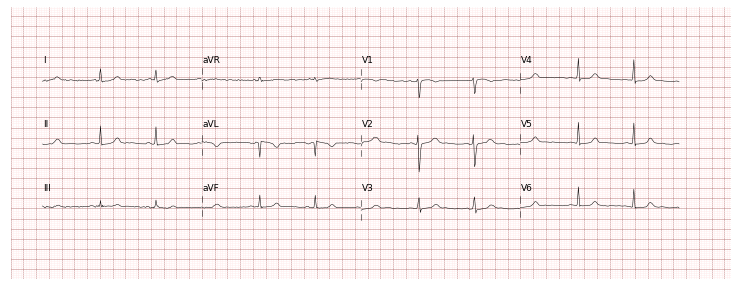

In [2]:
import pandas as pd
import numpy as np
import wfdb
import ast
import ecg_plot
import matplotlib.pyplot as plt
import random

X = np.load('some_signals.npy')
lead_index = ['I', 'II', 'III', 'aVL', 'aVR', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']  # order of the leads in the dataset
lead_display = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'] # order of the lead that I want to be shown


ecg_plot.plot(X[13, :250, :].T, sample_rate=100, columns=4, lead_index=lead_index, title='', lead_order=[0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11],
              show_lead_name=True, show_grid=True, show_separate_line=True, row_height=6.3, style=None)
ecg_plot.show()

In [5]:
for i in range(100):
    ecg_plot.plot(X[i, :250, :].T, sample_rate=100, columns=4, lead_index=lead_index, title='', lead_order=[0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11],
              show_lead_name=True, show_grid=True, show_separate_line=True, row_height=6.3, style=None)
    ecg_plot.save_as_jpg(str(i), path='./Image_dataset/')


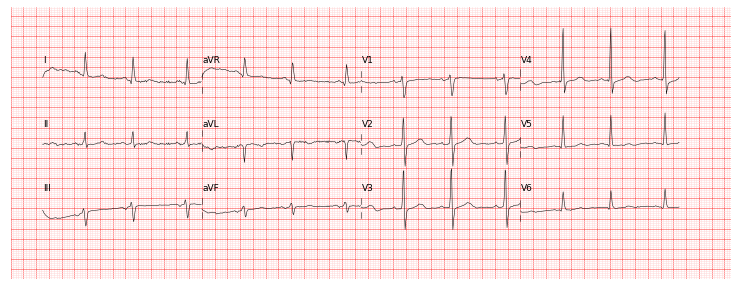

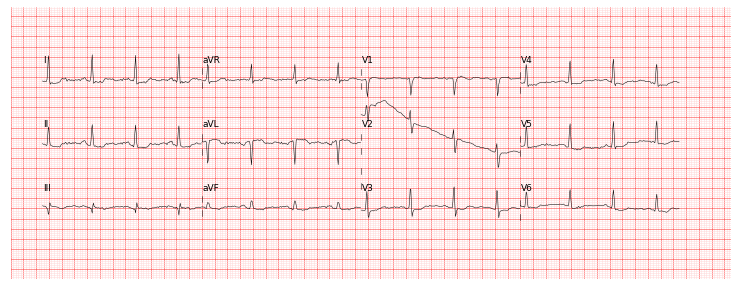

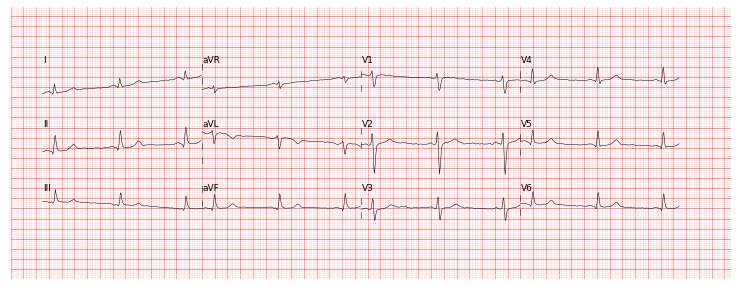

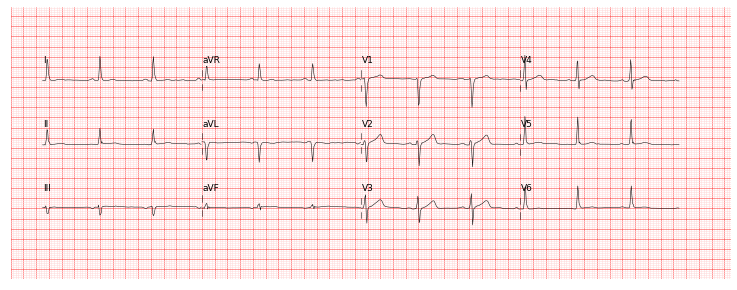

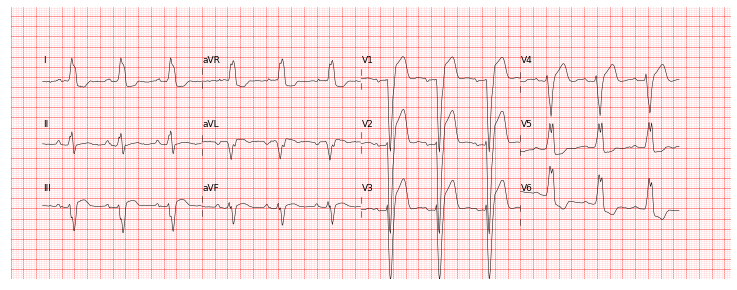

In [7]:
import random
for i in random.sample(range(1, 21799), 5):
    ecg_plot.plot(X[i, :250, :].T, sample_rate=100, columns=4, lead_index=lead_index, title='', lead_order=[0, 1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11],
                show_lead_name=True, show_grid=True, show_separate_line=True, row_height=6.3, style=None)


    ecg_plot.show()
    plt.close()